In [14]:
# code in chapter 11 of Python for Data Analysis
# time series
# data and time data types and tools
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
now= datetime.now()

In [3]:
now

datetime.datetime(2019, 3, 13, 22, 45, 18, 918327)

In [4]:
now.year,now.month,now.day

(2019, 3, 13)

In [5]:
# delta, which calculates the difference btw two time
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [6]:
delta.days

926

In [7]:
delta.seconds

56700

In [10]:
from datetime import timedelta

In [10]:
start = datetime(2011, 1, 7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [13]:
# converting btw string and datetime
stamp = datetime(2011, 1, 3)

In [ ]:
str(stamp)

In [14]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [15]:
value = '2011-01-03'

In [16]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [5]:
datestrs=['7/6/2011','8/6/2011']

In [18]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [3]:
# parser.parse in dateutil package 
from dateutil.parser import parse

In [20]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [21]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [24]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [6]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [7]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [8]:
idx[2]

NaT

In [9]:
pd.isnull(idx)

array([False, False,  True])

In [11]:
# time series basics
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8), 
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [16]:
ts=pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02   -0.928189
2011-01-05    1.085358
2011-01-07   -0.758896
2011-01-08    0.512571
2011-01-10   -1.317691
2011-01-12    0.186227
dtype: float64

In [17]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [18]:
ts[::2]

2011-01-02   -0.928189
2011-01-07   -0.758896
2011-01-10   -1.317691
dtype: float64

In [19]:
ts.index.dtype

dtype('<M8[ns]')

In [21]:
stamp=ts.index[0]

In [22]:
stamp

Timestamp('2011-01-02 00:00:00')

In [23]:
# indexing, selection, subsetting 
ts

2011-01-02   -0.928189
2011-01-05    1.085358
2011-01-07   -0.758896
2011-01-08    0.512571
2011-01-10   -1.317691
2011-01-12    0.186227
dtype: float64

In [24]:
stamp=ts.index[2]

In [25]:
ts[stamp]

-0.7588957880661577

In [26]:
ts['1/10/2011']

-1.3176913518352176

In [27]:
ts['20110110']

-1.3176913518352176

In [28]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.558528
2000-01-02   -0.544510
2000-01-03    1.018208
2000-01-04   -0.801074
2000-01-05   -0.196270
2000-01-06   -0.502180
2000-01-07    0.510418
2000-01-08    1.984317
2000-01-09   -0.690802
2000-01-10    0.478013
2000-01-11   -0.907556
2000-01-12    1.037084
2000-01-13    1.501805
2000-01-14    0.632277
2000-01-15    1.548330
2000-01-16    1.538154
2000-01-17    0.090918
2000-01-18   -0.233747
2000-01-19    1.556840
2000-01-20    0.243496
2000-01-21    0.225591
2000-01-22   -0.603152
2000-01-23    0.653217
2000-01-24   -0.332837
2000-01-25    0.512671
2000-01-26   -0.402089
2000-01-27    1.558805
2000-01-28    0.533918
2000-01-29    1.261141
2000-01-30    0.381182
                ...   
2002-08-28    0.986001
2002-08-29    0.201298
2002-08-30    0.121449
2002-08-31   -1.937098
2002-09-01   -0.456926
2002-09-02   -0.033077
2002-09-03    1.260201
2002-09-04    0.433902
2002-09-05    0.174482
2002-09-06   -0.275976
2002-09-07    0.563022
2002-09-08    0.589107
2002-09-09 

In [30]:
longer_ts['2001']

2001-01-01    0.476751
2001-01-02    0.544299
2001-01-03    0.202237
2001-01-04    0.429213
2001-01-05    0.678704
2001-01-06    0.023143
2001-01-07   -0.100648
2001-01-08    1.596178
2001-01-09   -0.057631
2001-01-10    0.277659
2001-01-11    0.684318
2001-01-12    1.294958
2001-01-13   -1.433382
2001-01-14    1.146486
2001-01-15   -0.581134
2001-01-16    2.580283
2001-01-17   -0.308124
2001-01-18   -0.844200
2001-01-19   -0.304583
2001-01-20   -0.370724
2001-01-21    0.579028
2001-01-22    0.179594
2001-01-23   -0.500936
2001-01-24    1.313478
2001-01-25    0.356405
2001-01-26   -0.469248
2001-01-27    1.972219
2001-01-28    2.142431
2001-01-29    0.385023
2001-01-30   -0.429449
                ...   
2001-12-02   -0.124074
2001-12-03   -2.516439
2001-12-04    1.378840
2001-12-05    0.274945
2001-12-06   -0.222969
2001-12-07   -0.504399
2001-12-08   -0.338367
2001-12-09   -0.576185
2001-12-10   -1.430877
2001-12-11    0.387948
2001-12-12   -0.744631
2001-12-13    1.209988
2001-12-14 

In [31]:
longer_ts['2001-05']

2001-05-01    0.161753
2001-05-02    1.614485
2001-05-03    0.009718
2001-05-04   -0.136007
2001-05-05   -0.112938
2001-05-06   -0.603464
2001-05-07   -0.600378
2001-05-08   -0.344219
2001-05-09    0.257520
2001-05-10    1.227503
2001-05-11    0.931302
2001-05-12   -0.229196
2001-05-13   -0.552832
2001-05-14   -1.003885
2001-05-15    0.035961
2001-05-16    1.504923
2001-05-17    0.377854
2001-05-18   -1.453255
2001-05-19    0.512897
2001-05-20   -0.647614
2001-05-21    0.340445
2001-05-22    0.372968
2001-05-23   -1.836413
2001-05-24    1.257327
2001-05-25   -0.257051
2001-05-26   -0.906389
2001-05-27    0.586654
2001-05-28   -0.345523
2001-05-29   -0.391815
2001-05-30   -0.524056
2001-05-31    0.440519
Freq: D, dtype: float64

In [32]:
ts[datetime(2011,1,7)]

-0.7588957880661577

In [33]:
ts

2011-01-02   -0.928189
2011-01-05    1.085358
2011-01-07   -0.758896
2011-01-08    0.512571
2011-01-10   -1.317691
2011-01-12    0.186227
dtype: float64

In [34]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.758896
2011-01-08    0.512571
2011-01-10   -1.317691
dtype: float64

In [35]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.928189
2011-01-05    1.085358
2011-01-07   -0.758896
2011-01-08    0.512571
dtype: float64

In [36]:
dates=pd.date_range('1/1/2000',periods=100,freq='W-WED')

In [37]:
long_df=pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

In [38]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.515164,0.175584,-0.744936,0.034481
2001-05-09,0.910920,-0.442841,0.550786,-1.020242
2001-05-16,0.150135,-0.618337,-2.223209,0.529000
2001-05-23,0.845295,0.495554,0.443767,-0.174443
2001-05-30,-0.901121,1.069921,-0.064470,0.718469


In [41]:
# time series w/ duplicate indices
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', 
                          '1/2/2000', '1/3/2000'])

In [42]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [43]:
dup_ts.index.is_unique

False

In [44]:
dup_ts['1/3/2000'] # not duplicated

4

In [45]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [46]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [47]:
grouped.count() # merge duplicated data

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [48]:
# date ranges, frequencies, and shifting
resampler = ts.resample('D') # 'D' means daily frequency

In [49]:
# generating date ranges
index=pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [50]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [52]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [53]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [54]:
nor_date = pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)
nor_date

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [55]:
nor_date[0]

Timestamp('2012-05-02 00:00:00', freq='D')

In [56]:
# frequencies and date offsets
from pandas.tseries.offsets import Hour, Minute

In [57]:
hour = Hour()
hour

<Hour>

In [58]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [59]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [60]:
Hour(2) + Minute(30)

<150 * Minutes>

In [61]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [62]:
# week of month dates
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [63]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [64]:
# shifting (Leading and Lagging) Data
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.454307
2000-02-29   -0.228027
2000-03-31   -0.388541
2000-04-30   -1.139507
Freq: M, dtype: float64

In [65]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.454307
2000-04-30   -0.228027
Freq: M, dtype: float64

In [66]:
ts.shift(-2)

2000-01-31   -0.388541
2000-02-29   -1.139507
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [67]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.498078
2000-03-31    0.703927
2000-04-30    1.932786
Freq: M, dtype: float64

In [68]:
ts

2000-01-31   -0.454307
2000-02-29   -0.228027
2000-03-31   -0.388541
2000-04-30   -1.139507
Freq: M, dtype: float64

In [69]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.454307
2000-04-30   -0.228027
Freq: M, dtype: float64

In [70]:
ts.shift(3, freq='D')

2000-02-03   -0.454307
2000-03-03   -0.228027
2000-04-03   -0.388541
2000-05-03   -1.139507
dtype: float64

In [71]:
# shifting dates with offsets
from pandas.tseries.offsets import Day, MonthEnd

In [72]:
now = datetime(2011, 11, 17)

In [73]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [74]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [75]:
offset = MonthEnd()

In [76]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [77]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.027609
2000-01-19   -1.734513
2000-01-23   -0.356086
2000-01-27   -0.866106
2000-01-31    0.419769
2000-02-04    2.116065
2000-02-08   -0.713114
2000-02-12   -2.337332
2000-02-16    0.507971
2000-02-20    0.666623
2000-02-24    0.666462
2000-02-28   -0.262483
2000-03-03    1.024944
2000-03-07   -0.921002
2000-03-11    1.179982
2000-03-15   -0.856599
2000-03-19   -1.259238
2000-03-23   -1.477827
2000-03-27   -1.437644
2000-03-31    0.125249
Freq: 4D, dtype: float64

In [78]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.512909
2000-02-29    0.092028
2000-03-31   -0.452767
dtype: float64

In [79]:
ts.resample('M').mean()

2000-01-31   -0.512909
2000-02-29    0.092028
2000-03-31   -0.452767
Freq: M, dtype: float64

In [80]:
# time zone handling
import pytz

In [81]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [82]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [83]:
# Time Zone Localization and Conversion
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [84]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.169645
2012-03-10 09:30:00   -1.913373
2012-03-11 09:30:00    0.047859
2012-03-12 09:30:00    1.006302
2012-03-13 09:30:00   -0.277860
2012-03-14 09:30:00   -0.432996
Freq: D, dtype: float64

In [85]:
print(ts.index.tz)

None


In [86]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [87]:
ts

2012-03-09 09:30:00   -0.169645
2012-03-10 09:30:00   -1.913373
2012-03-11 09:30:00    0.047859
2012-03-12 09:30:00    1.006302
2012-03-13 09:30:00   -0.277860
2012-03-14 09:30:00   -0.432996
Freq: D, dtype: float64

In [88]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.169645
2012-03-10 09:30:00+00:00   -1.913373
2012-03-11 09:30:00+00:00    0.047859
2012-03-12 09:30:00+00:00    1.006302
2012-03-13 09:30:00+00:00   -0.277860
2012-03-14 09:30:00+00:00   -0.432996
Freq: D, dtype: float64

In [89]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [90]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.169645
2012-03-10 04:30:00-05:00   -1.913373
2012-03-11 05:30:00-04:00    0.047859
2012-03-12 05:30:00-04:00    1.006302
2012-03-13 05:30:00-04:00   -0.277860
2012-03-14 05:30:00-04:00   -0.432996
Freq: D, dtype: float64

In [91]:
ts_eastern = ts.tz_localize('America/New_York')

In [92]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.169645
2012-03-10 14:30:00+00:00   -1.913373
2012-03-11 13:30:00+00:00    0.047859
2012-03-12 13:30:00+00:00    1.006302
2012-03-13 13:30:00+00:00   -0.277860
2012-03-14 13:30:00+00:00   -0.432996
Freq: D, dtype: float64

In [93]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.169645
2012-03-10 15:30:00+01:00   -1.913373
2012-03-11 14:30:00+01:00    0.047859
2012-03-12 14:30:00+01:00    1.006302
2012-03-13 14:30:00+01:00   -0.277860
2012-03-14 14:30:00+01:00   -0.432996
Freq: D, dtype: float64

In [94]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [95]:
# Operations with Time Zone−Aware Timestamp Objects
stamp = pd.Timestamp('2011-03-12 04:00')

In [96]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [98]:
from pandas.tseries.offsets import Hour

In [99]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [100]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [101]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [102]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [103]:
# Operations Between Diferent Time Zones
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [104]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.384878
2012-03-08 09:30:00    0.322246
2012-03-09 09:30:00   -0.040892
2012-03-12 09:30:00    0.937544
2012-03-13 09:30:00    0.618819
2012-03-14 09:30:00   -0.997351
2012-03-15 09:30:00    0.202103
2012-03-16 09:30:00   -0.134588
2012-03-19 09:30:00    1.296594
2012-03-20 09:30:00   -0.660478
Freq: B, dtype: float64

In [105]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2

In [106]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [107]:
# Periods and Period Arithmetic
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [108]:
p+5

Period('2012', 'A-DEC')

In [109]:
pd.Period('2014', freq='A-DEC') - p

7

In [110]:
rng = pd.period_range('2000-01-01', '2000-06-03', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [111]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.822289
2000-02   -0.454753
2000-03   -0.364277
2000-04    0.722581
2000-05   -0.171416
2000-06    0.118493
Freq: M, dtype: float64

In [112]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [113]:
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [114]:
# Period Frequency Conversion
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [115]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [116]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [117]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [118]:
p = pd.Period('Aug-2007', 'M')

In [119]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [120]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [121]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.788689
2007    0.311774
2008   -0.124810
2009   -0.612881
Freq: A-DEC, dtype: float64

In [122]:
ts.asfreq('M', how='start')

2006-01   -0.788689
2007-01    0.311774
2008-01   -0.124810
2009-01   -0.612881
Freq: M, dtype: float64

In [123]:
ts.asfreq('B', how='end')

2006-12-29   -0.788689
2007-12-31    0.311774
2008-12-31   -0.124810
2009-12-31   -0.612881
Freq: B, dtype: float64

In [124]:
# Quarterly Period Frequencies
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [125]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [126]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [127]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [128]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [129]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [130]:
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [131]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [132]:
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [133]:
# Converting Timestamps to Periods (and Back)
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [134]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.099265
2000-02-29   -0.422032
2000-03-31    0.333997
Freq: M, dtype: float64

In [135]:
pts = ts.to_period()
pts

2000-01   -0.099265
2000-02   -0.422032
2000-03    0.333997
Freq: M, dtype: float64

In [136]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
rng

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [137]:
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.453573
2000-01-30    1.640496
2000-01-31    0.194166
2000-02-01    0.008476
2000-02-02   -0.099204
2000-02-03   -0.832869
Freq: D, dtype: float64

In [138]:
pts = ts2.to_period()
pts

2000-01-29    0.453573
2000-01-30    1.640496
2000-01-31    0.194166
2000-02-01    0.008476
2000-02-02   -0.099204
2000-02-03   -0.832869
Freq: D, dtype: float64

In [139]:
pts.to_timestamp(how='end')

2000-01-29    0.453573
2000-01-30    1.640496
2000-01-31    0.194166
2000-02-01    0.008476
2000-02-02   -0.099204
2000-02-03   -0.832869
Freq: D, dtype: float64

In [141]:
# Creating a PeriodIndex from Arrays
data = pd.read_csv('macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [142]:
data.year[:5]

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [143]:
data.quarter[:5]

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

In [144]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, 
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [145]:
data.index = index

In [146]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [147]:
data.infl[:5]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

In [148]:
# Resampling and Frequency Conversion
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [149]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.929811
2000-01-02   -0.184096
2000-01-03   -1.284733
2000-01-04    0.704495
2000-01-05    0.830240
2000-01-06    0.175429
2000-01-07   -1.856334
2000-01-08   -2.235865
2000-01-09   -0.493836
2000-01-10    0.151510
2000-01-11   -0.415840
2000-01-12    1.044128
2000-01-13    0.142167
2000-01-14   -1.136597
2000-01-15    0.275642
2000-01-16    1.160875
2000-01-17   -0.063521
2000-01-18    1.229496
2000-01-19   -1.800504
2000-01-20   -0.146115
2000-01-21    0.046394
2000-01-22   -0.167608
2000-01-23    1.592345
2000-01-24    2.063965
2000-01-25    1.065470
2000-01-26    0.744320
2000-01-27    1.685934
2000-01-28   -0.506316
2000-01-29    1.178973
2000-01-30    1.081114
                ...   
2000-03-11   -1.345151
2000-03-12    0.634441
2000-03-13   -1.386292
2000-03-14   -0.667963
2000-03-15   -1.133550
2000-03-16    2.240532
2000-03-17   -0.094215
2000-03-18    1.237951
2000-03-19    0.215003
2000-03-20    1.070531
2000-03-21    1.171714
2000-03-22    0.644365
2000-03-23 

In [150]:
ts.resample('M').mean()

2000-01-31    0.176075
2000-02-29    0.155833
2000-03-31   -0.084435
2000-04-30    0.324756
Freq: M, dtype: float64

In [151]:
ts.resample('M', kind='period').mean()

2000-01    0.176075
2000-02    0.155833
2000-03   -0.084435
2000-04    0.324756
Freq: M, dtype: float64

In [152]:
# downsampling
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [153]:
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [154]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [155]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [156]:
ts.resample('5min', closed='right', 
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [157]:
ts.resample('5min', closed='right', 
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [158]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [159]:
# unsampling and interpolation
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.453676,-0.706157,0.015886,-1.426245
2000-01-12,-1.354596,-0.484623,0.480643,1.255917


In [160]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.453676,-0.706157,0.015886,-1.426245
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.354596,-0.484623,0.480643,1.255917


In [161]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.453676,-0.706157,0.015886,-1.426245
2000-01-06,-1.453676,-0.706157,0.015886,-1.426245
2000-01-07,-1.453676,-0.706157,0.015886,-1.426245
2000-01-08,-1.453676,-0.706157,0.015886,-1.426245
2000-01-09,-1.453676,-0.706157,0.015886,-1.426245
2000-01-10,-1.453676,-0.706157,0.015886,-1.426245
2000-01-11,-1.453676,-0.706157,0.015886,-1.426245
2000-01-12,-1.354596,-0.484623,0.480643,1.255917


In [162]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.453676,-0.706157,0.015886,-1.426245
2000-01-06,-1.453676,-0.706157,0.015886,-1.426245
2000-01-07,-1.453676,-0.706157,0.015886,-1.426245
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.354596,-0.484623,0.480643,1.255917


In [163]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.453676,-0.706157,0.015886,-1.426245
2000-01-13,-1.354596,-0.484623,0.480643,1.255917


In [164]:
# resampling w/ periods
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.525345,1.076262,-0.340671,-0.860166
2000-02,1.135100,2.456629,-0.442476,0.201060
2000-03,0.444832,2.298272,1.652732,0.680214
2000-04,0.569379,0.203372,1.738126,-1.245761
2000-05,-0.578070,-0.449844,0.242638,0.291902


In [165]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.149974,0.422754,0.270998,-0.074873
2001,-0.194303,0.444502,-0.126458,0.511602


In [166]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.149974,0.422754,0.270998,-0.074873
2000Q2,0.149974,0.422754,0.270998,-0.074873
2000Q3,0.149974,0.422754,0.270998,-0.074873
2000Q4,0.149974,0.422754,0.270998,-0.074873
2001Q1,-0.194303,0.444502,-0.126458,0.511602
2001Q2,-0.194303,0.444502,-0.126458,0.511602
2001Q3,-0.194303,0.444502,-0.126458,0.511602
2001Q4,-0.194303,0.444502,-0.126458,0.511602


In [167]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.149974,0.422754,0.270998,-0.074873
2001Q1,0.149974,0.422754,0.270998,-0.074873
2001Q2,0.149974,0.422754,0.270998,-0.074873
2001Q3,0.149974,0.422754,0.270998,-0.074873
2001Q4,-0.194303,0.444502,-0.126458,0.511602


In [168]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.149974,0.422754,0.270998,-0.074873
2001Q1,0.149974,0.422754,0.270998,-0.074873
2001Q2,0.149974,0.422754,0.270998,-0.074873
2001Q3,0.149974,0.422754,0.270998,-0.074873
2001Q4,-0.194303,0.444502,-0.126458,0.511602
2002Q1,-0.194303,0.444502,-0.126458,0.511602
2002Q2,-0.194303,0.444502,-0.126458,0.511602
2002Q3,-0.194303,0.444502,-0.126458,0.511602


In [169]:
# moving window functions
%matplotlib inline

In [172]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

close_px = close_px.resample('B').ffill()

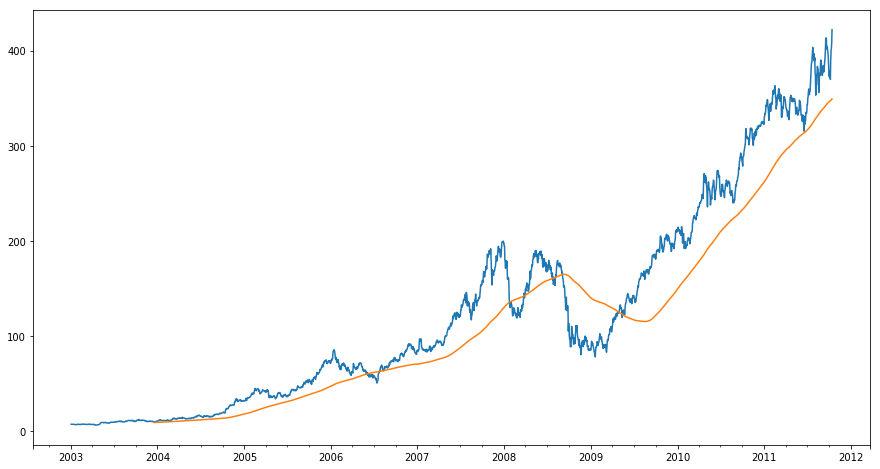

In [173]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot(figsize=(15, 8))

In [174]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

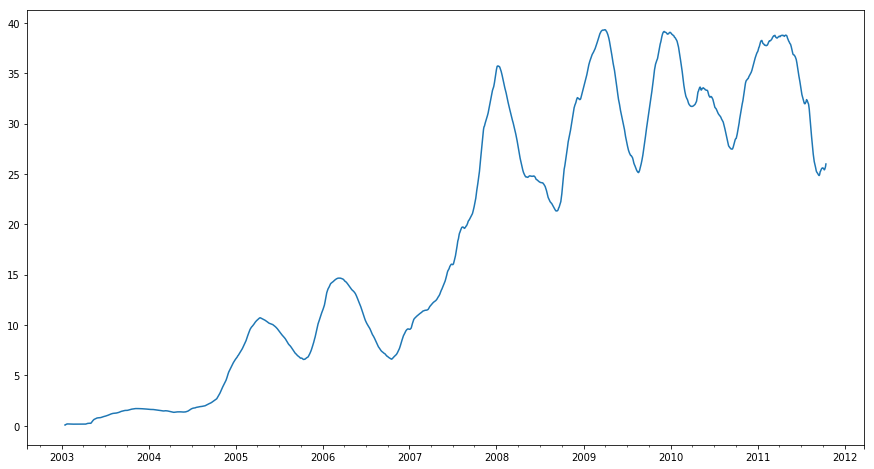

In [175]:
appl_std250.plot(figsize=(15, 8))

In [176]:
rolling_mean = close_px.rolling('20D').mean()
print(rolling_mean.head())
print(rolling_mean.tail())

                AAPL       MSFT        XOM
2003-01-02  7.400000  21.110000  29.220000
2003-01-03  7.425000  21.125000  29.230000
2003-01-06  7.433333  21.256667  29.473333
2003-01-07  7.432500  21.425000  29.342500
2003-01-08  7.402000  21.402000  29.240000
                  AAPL       MSFT        XOM
2011-10-10  389.351429  25.602143  72.527857
2011-10-11  388.505000  25.674286  72.835000
2011-10-12  388.531429  25.810000  73.400714
2011-10-13  388.826429  25.961429  73.905000
2011-10-14  391.038000  26.048667  74.185333


In [177]:
# Exponentially Weighted Functions
aapl_px = close_px.AAPL['2006':'2007']

In [178]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [179]:
ewma60 = aapl_px.ewm(span=30).mean()

NameError: name 'plt' is not defined

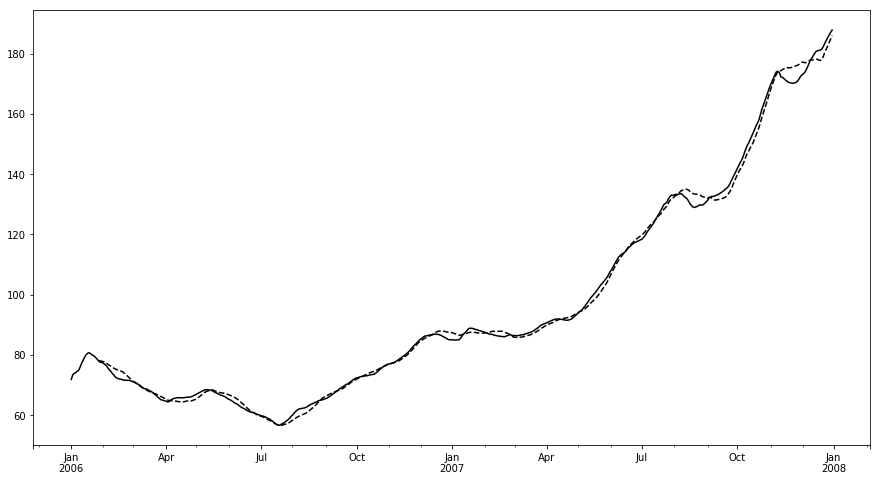

In [180]:
ma60.plot(style='k--', label='Simple MA', figsize=(15, 8))
ewma60.plot(style='k-', label='EW MA', figsize=(15, 8))
plt.legend()

In [182]:
# Binary Moving Window Functions
spx_px = close_px_all['SPX']

In [183]:
spx_rets = spx_px.pct_change()

In [184]:
returns = close_px.pct_change()

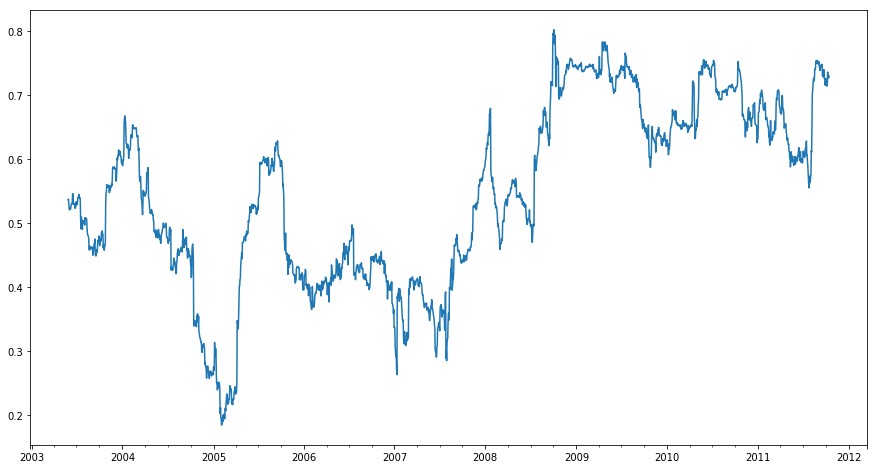

In [185]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot(figsize=(15, 8))

In [186]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

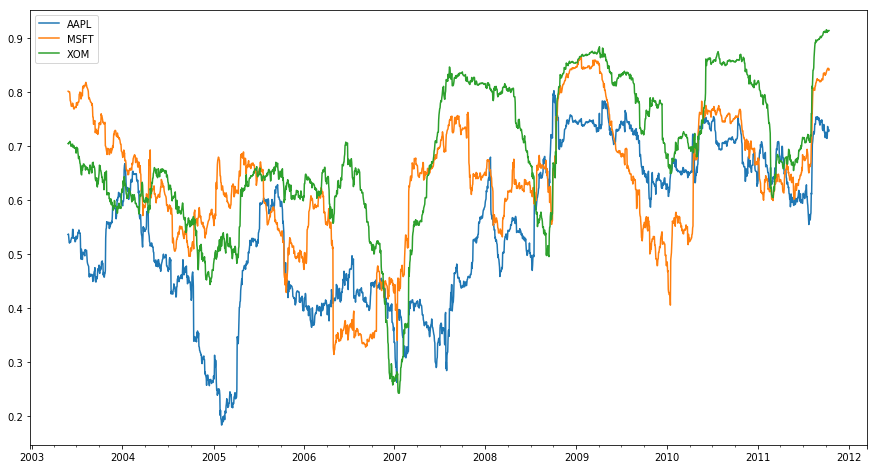

In [187]:
corr.plot(figsize=(15, 8))

In [189]:
# User-Defined Moving Window Functions
from scipy.stats import percentileofscore

In [190]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [191]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


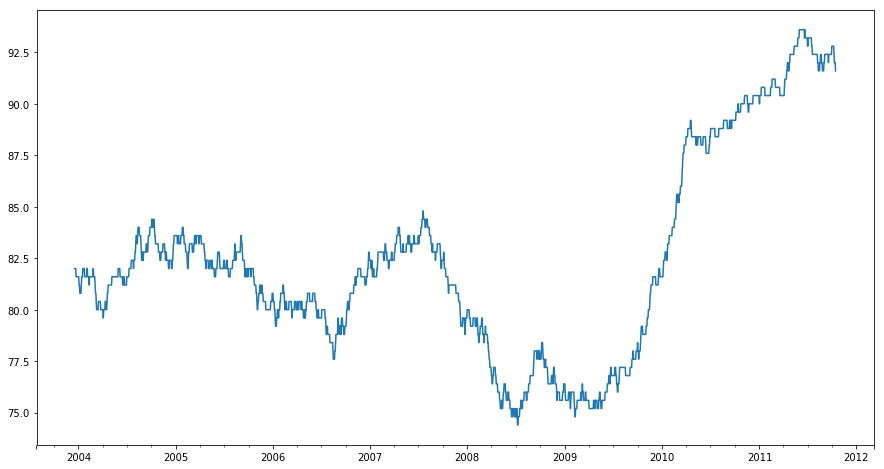

In [192]:
result.plot(figsize=(15, 8))